In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Função-alvo

In [2]:
def target_function(x):
    return 5 * x + 10

# Dados de Treinamento Sintéticos

In [3]:
x_train = torch.linspace(-5, 5, 200).unsqueeze(1)
y_train = target_function(x_train)

# Definindo a Rede Neural

In [4]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64),
            nn.Linear(64, 64),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

# Inicializamos a Rede, Definimos um Custo e um Otimizador

In [5]:
model = SimpleNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Treinamos a Rede

In [6]:
epochs = 1000

for epoch in range(epochs):

    model.train()
    optimizer.zero_grad()

    output = model(x_train)

    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Época {epoch+1}, Loss: {loss.item():.4f}')

Época 100, Loss: 0.0000
Época 200, Loss: 0.0000
Época 300, Loss: 0.0000
Época 400, Loss: 0.0000
Época 500, Loss: 0.0000
Época 600, Loss: 0.0000
Época 700, Loss: 0.0000
Época 800, Loss: 0.0000
Época 900, Loss: 0.0000
Época 1000, Loss: 0.0000


# Função Auxiliar para Plotar os Resultados

In [7]:
def plot_model(model, title, x_range=(-5, 5)):
    model.eval()
    x_test = torch.linspace(x_range[0], x_range[1], 400).unsqueeze(1)
    y_true = target_function(x_test).detach().numpy()
    y_pred = model(x_test).detach().numpy()
    x_test_np = x_test.numpy()

    plt.figure(figsize=(8, 4))
    plt.plot(x_test_np, y_true, label='Função verdadeira', color='blue')
    plt.plot(x_test_np, y_pred, label='Predição da rede neural', color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Resultados

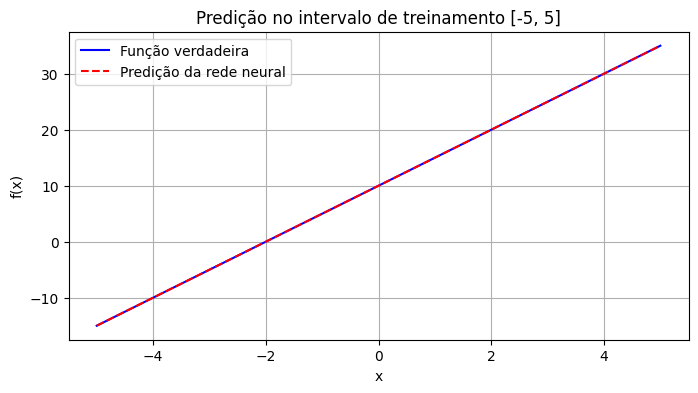

In [8]:
plot_model(model, 'Predição no intervalo de treinamento [-5, 5]', x_range=(-5, 5))